# Convolution using a real-world example 

## Section 1: 1D Convolution

#### Record a few seconds of audio:

In [63]:
import sounddevice as sd
from scipy.io.wavfile import write

# Parameters
duration = 2  # seconds
sample_rate = 44100  # standard CD-quality

print("Recording... 🎙️")
data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float32')
sd.wait()  # Wait until recording is finished
print("Done recording ✅")

# Save to a WAV file
write("my_recording.wav", sample_rate, data)


Recording... 🎙️
Done recording ✅


In [60]:
data.shape

(8820, 1)

### Load the WAV file:

In [64]:
import soundfile as sf
import torch
import torch.nn.functional as F
from torch import nn

# Load audio
waveform, sample_rate = sf.read("my_recording.wav")

# Mono (if stereo, take one channel)
if waveform.ndim > 1:
    waveform = waveform[:, 0]

# Convert to torch tensor and reshape to (batch, channels, samples)
waveform = torch.tensor(waveform, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1, 1, N]


### Play the original waveform

In [65]:
# Optionally play it
from IPython.display import Audio
Audio(data[:,0],rate=sample_rate)

### Plot the original waveform

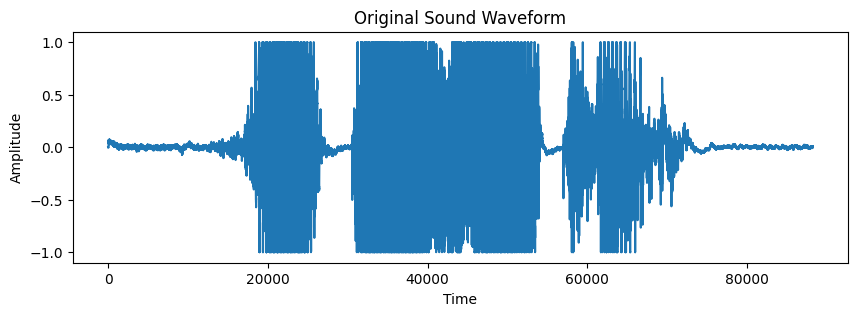

In [46]:
import matplotlib.pyplot as plt
# Plot original waveform
plt.figure(figsize=(10, 3))
plt.plot(data)
plt.title("Original Sound Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [26]:
waveform

tensor([[[ 0.0000e+00,  0.0000e+00, -3.0518e-05,  ..., -1.0101e-02,
          -1.1017e-02, -8.7891e-03]]])

### Define a simple Conv1d layer:

In [56]:
# Define a kernel manually (e.g., moving average)
# kernel = torch.tensor([[[-1, 0, 1]]], dtype=torch.float32)  # Edge detector
kernel = torch.tensor([[[1, 1, 1,1,1,1]]], dtype=torch.float32) / 3  # Smoothing

# Apply convolution (same padding)
filtered = F.conv1d(waveform, kernel, padding=1,stride=2)

# Remove batch dimension
filtered_waveform = filtered.squeeze().detach().numpy()

print(f"Filtered shape: {filtered.shape}")


Filtered shape: torch.Size([1, 1, 44099])


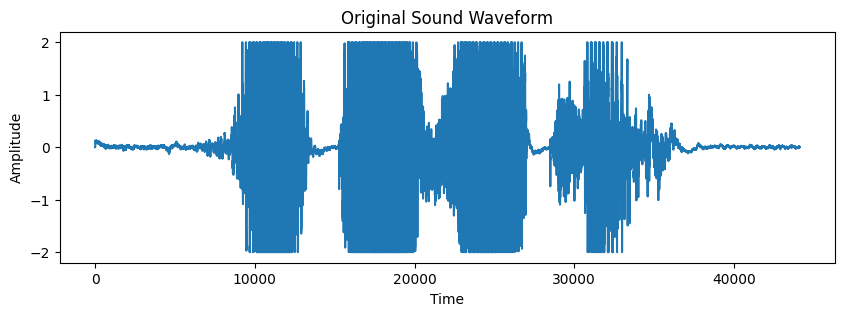

In [57]:
import matplotlib.pyplot as plt
# Plot original waveform
plt.figure(figsize=(10, 3))
plt.plot(filtered_waveform)
plt.title("Original Sound Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Listen to the result:

In [58]:
# Listen using IPython
from IPython.display import Audio
Audio(filtered_waveform, rate=sample_rate)


## Section 1: 2D Convolution

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt


### Load and Display an RGB Image:

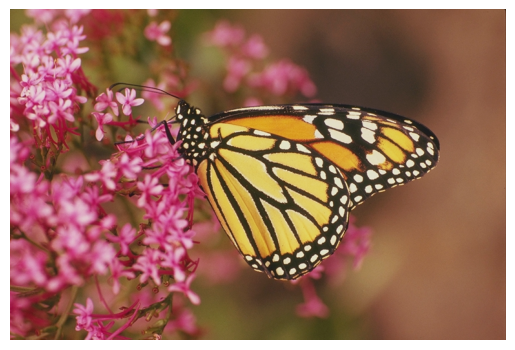

In [2]:
# Load the image
image = Image.open("data/Images/monarch.bmp")  # Replace with your filename

# Show original image
plt.imshow(image)
# plt.title("Original RGB Image")
plt.axis('off')
plt.show()


### Convert to Grayscale and Visualize

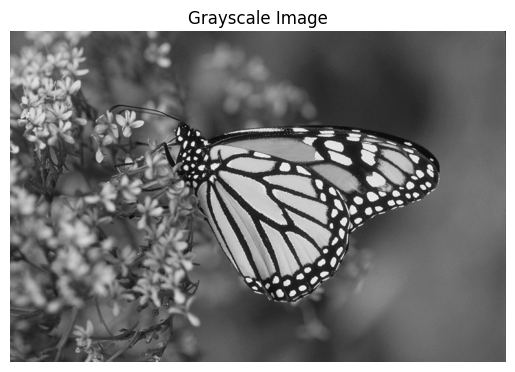

In [5]:
gray_transform = transforms.Compose([
    transforms.Grayscale(),          # Convert to grayscale
    transforms.ToTensor(),          # Convert to torch tensor (C × H × W)
])

gray_image_tensor = gray_transform(image)  # Shape: [1, H, W]

# Show grayscale image
plt.imshow(gray_image_tensor.squeeze(0), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


In [7]:
gray_image_tensor.shape

torch.Size([1, 512, 768])

### Define a Simple Conv2D Filter:

In [6]:
# Make input shape [1, 1, H, W] → (batch, channel, height, width)
input_tensor = gray_image_tensor.unsqueeze(0)

# Define Conv2D layer manually
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

# Edge detection kernel (Sobel-like)
kernel = torch.tensor([[[-1.0, -1.0, -1.0],
                        [ 0.0,  0.0,  -1.0],
                        [ -1.0,  1.0,  1.0]]])  # shape: [1, 3, 3]

# Set kernel weights
conv.weight.data = kernel.unsqueeze(0)  # shape: [1, 1, 3, 3]


### Apply Conv2D and Show the Output

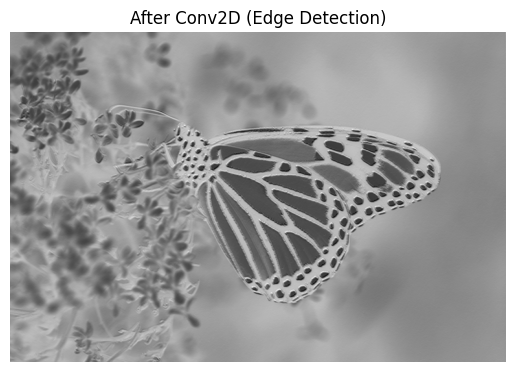

In [55]:
output = conv(input_tensor)

# Visualize the result
plt.imshow(output.squeeze(0).squeeze(0).detach(), cmap='gray')
plt.title("After Conv2D (Edge Detection)")
plt.axis('off')
plt.show()
